In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import gffutils

In [93]:
main_path = Path('..')
data_path = main_path / 'Data'
ref_path = data_path / 'GRCh38genome'
preprocessing_path = data_path / 'Preprocessing_LNDR_HNDR'
intersect_path = data_path / 'intersect_regions'
transcriptome_path = data_path / 'transcriptome'

In [3]:
# fn = gffutils.example_filename(ref_path.absolute() / 'gencode.v47.basic.annotation.gff3')

In [4]:
## One time operation

# db = gffutils.create_db(fn, dbfn=str(ref_path.resolve() / 'gencode.v47.basic.annotation.db'), force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)
# print('done')

In [32]:
db = gffutils.FeatureDB(str(ref_path.resolve() / 'gencode.v47.basic.annotation.db'))

In [70]:
c = 0
transcript_to_gene = {}
for transcript in db.features_of_type('transcript'):
    if transcript.id not in transcript_to_gene:
        assert len(transcript['Parent']) == 1
        assert len(transcript['gene_id']) == 1
        assert transcript['gene_id'][0] == transcript['Parent'][0]
        transcript_to_gene[transcript.id] = transcript['Parent'][0]
    else:
        print(transcript)

In [73]:
print(f'# of transcripts: {len(transcript_to_gene)}')

# of transcripts: 158338


In [91]:
# import json
# with open(ref_path / 'transcript_to_gene.json', 'w') as fout:
#     json.dump(transcript_to_gene, fout)

#### Some Checks

In [81]:
GRCh38_annotations = []
with open(str(ref_path.resolve() / 'GRCh38.p14.annotations')) as fin:
    for line in fin:
        if line.startswith('ENST'):
            GRCh38_annotations.append(line.split()[0])
        else:
            print(line)

print(f'# of transcripts in ref used: {len(GRCh38_annotations)} | {len(set(GRCh38_annotations))}')
c = 0
for entry in GRCh38_annotations:
    if entry in transcript_to_gene:
        c += 1

print(f'# of transcripts present in map db: {c} of {len(GRCh38_annotations)}')

#name	chrom	strand	txStart	txEnd	cdsStart	cdsEnd	exonCount	exonStarts	exonEnds	proteinID	alignID

# of transcripts in ref used: 278220 | 278220
# of transcripts present in map db: 109000 of 278220


In [88]:
def get_no_transcripts(path, label):
    transcripts = []
    with open(path) as fin:
        for line in fin:
            transcripts.append(line.split()[3])

    print(f'# of transcripts in {label} used: {len(transcripts)} | {len(set(transcripts))}')
    c = 0
    for entry in set(transcripts):
        if entry in transcript_to_gene:
            c += 1

    print(f'# of transcripts present in map db: {c} of {len(set(transcripts))}')
    print(' ')

get_no_transcripts(preprocessing_path / 'GRCh38.p14.promoter.sorted.bed', 'promoter')
get_no_transcripts(preprocessing_path / 'GRCh38.p14.intron.1.start.sorted.bed', 'intron.1.start')
get_no_transcripts(preprocessing_path / 'GRCh38.p14.intron.1.end.sorted.bed', 'intron.1.end')
get_no_transcripts(preprocessing_path / 'GRCh38.p14.intron.2.start.sorted.bed', 'intron.2.start')

# of transcripts in promoter used: 106261 | 106261
# of transcripts present in map db: 61499 of 106261
 
# of transcripts in intron.1.start used: 104611 | 104611
# of transcripts present in map db: 59891 of 104611
 
# of transcripts in intron.1.end used: 104611 | 104611
# of transcripts present in map db: 59891 of 104611
 
# of transcripts in intron.2.start used: 98596 | 98596
# of transcripts present in map db: 56542 of 98596
 


In [89]:
def get_no_transcripts(path, label):
    transcripts = []
    with open(path) as fin:
        for line in fin:
            transcripts.append(line.split()[3])

    print(f'# of transcripts in {label} used: {len(transcripts)} | {len(set(transcripts))}')
    c = 0
    for entry in set(transcripts):
        if entry in transcript_to_gene:
            c += 1

    print(f'# of transcripts present in map db: {c} of {len(set(transcripts))}')
    print(' ')

for region in ['promoter', 'intron.1.start', 'intron.1.end', 'intron.2.start']:
    get_no_transcripts(intersect_path / f'NDR.{region}.intersect.bed', f'NDR.{region}')
    get_no_transcripts(intersect_path / f'NOR.{region}.intersect.bed', f'NOR.{region}')

# of transcripts in NDR.promoter used: 35482 | 29716
# of transcripts present in map db: 17641 of 29716
 
# of transcripts in NOR.promoter used: 138137 | 106248
# of transcripts present in map db: 61486 of 106248
 
# of transcripts in NDR.intron.1.start used: 24960 | 21451
# of transcripts present in map db: 12645 of 21451
 
# of transcripts in NOR.intron.1.start used: 126703 | 104611
# of transcripts present in map db: 59891 of 104611
 
# of transcripts in NDR.intron.1.end used: 17045 | 15210
# of transcripts present in map db: 8839 of 15210
 
# of transcripts in NOR.intron.1.end used: 118858 | 104611
# of transcripts present in map db: 59891 of 104611
 
# of transcripts in NDR.intron.2.start used: 16768 | 14841
# of transcripts present in map db: 8466 of 14841
 
# of transcripts in NOR.intron.2.start used: 112739 | 98596
# of transcripts present in map db: 56542 of 98596
 


In [90]:
def get_no_transcripts(path, label):
    transcripts = []
    with open(path) as fin:
        for line in fin:
            transcripts.append(line.split()[3])

    print(f'# of transcripts in {label} used: {len(transcripts)} | {len(set(transcripts))}')
    c = 0
    for entry in set(transcripts):
        if entry in transcript_to_gene:
            c += 1

    print(f'# of transcripts present in map db: {c} of {len(set(transcripts))}')
    print(' ')

for region in ['promoter', 'intron.1.start', 'intron.1.end', 'intron.2.start']:
    get_no_transcripts(intersect_path / f'HCG.{region}.intersect.bed', f'HCG.{region}')

# of transcripts in HCG.promoter used: 2372428 | 97778
# of transcripts present in map db: 56164 of 97778
 
# of transcripts in HCG.intron.1.start used: 2037976 | 96270
# of transcripts present in map db: 54809 of 96270
 
# of transcripts in HCG.intron.1.end used: 1761218 | 96251
# of transcripts present in map db: 54826 of 96251
 
# of transcripts in HCG.intron.2.start used: 1674529 | 90982
# of transcripts present in map db: 51979 of 90982
 


In [92]:
def get_no_transcripts(path, label):
    transcripts = []
    with open(path) as fin:
        for line in fin:
            transcripts.append(line.split()[3])

    print(f'# of transcripts in {label} used: {len(transcripts)} | {len(set(transcripts))}')
    c = 0
    for entry in set(transcripts):
        if entry in transcript_to_gene:
            c += 1

    print(f'# of transcripts present in map db: {c} of {len(set(transcripts))}')
    print(' ')

for region in ['promoter', 'intron.1.start', 'intron.1.end', 'intron.2.start']:
    get_no_transcripts(intersect_path / f'{region}.NDR.HCG.intersect.bed', f'NDR.HCG.{region}')
    get_no_transcripts(intersect_path / f'{region}.NOR.HCG.intersect.bed', f'NOR.HCG.{region}')

# of transcripts in NDR.HCG.promoter used: 14951744 | 29714
# of transcripts present in map db: 17640 of 29714
 
# of transcripts in NOR.HCG.promoter used: 36293236 | 98047
# of transcripts present in map db: 56328 of 98047
 
# of transcripts in NDR.HCG.intron.1.start used: 7819327 | 21448
# of transcripts present in map db: 12644 of 21448
 
# of transcripts in NOR.HCG.intron.1.start used: 23451580 | 96630
# of transcripts present in map db: 55027 of 96630
 
# of transcripts in NDR.HCG.intron.1.end used: 3784364 | 15205
# of transcripts present in map db: 8837 of 15205
 
# of transcripts in NOR.HCG.intron.1.end used: 16343587 | 96501
# of transcripts present in map db: 54952 of 96501
 
# of transcripts in NDR.HCG.intron.2.start used: 3891587 | 14838
# of transcripts present in map db: 8464 of 14838
 
# of transcripts in NOR.HCG.intron.2.start used: 15750720 | 91240
# of transcripts present in map db: 52126 of 91240
 


#### Read trancriptome data

In [104]:
df_expression = pd.read_csv(transcriptome_path / 'LTC_HepG2_MonoCal_FA.rep1.TPM.txt', sep='\t', names=['id', 'expression'], header=0)

In [128]:
df_expression['gene_id'] = df_expression['id'].str.split(':').str[0]

In [129]:
df_expression.head()

,id,expression,gene_id
0,ENSG00000219391:AC019129.1,0.0,ENSG00000219391
1,ENSG00000224632:Z73361.1,0.0,ENSG00000224632
2,ENSG00000281691:RBM5-AS1,0.0,ENSG00000281691
3,ENSG00000222293:RNU2-36P,0.0,ENSG00000222293
4,ENSG00000283803:MIR3198-2,0.0,ENSG00000283803


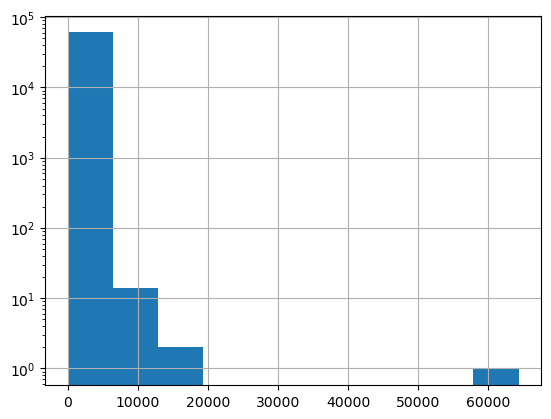

In [130]:
df_expression['expression'].hist()
plt.yscale('log')

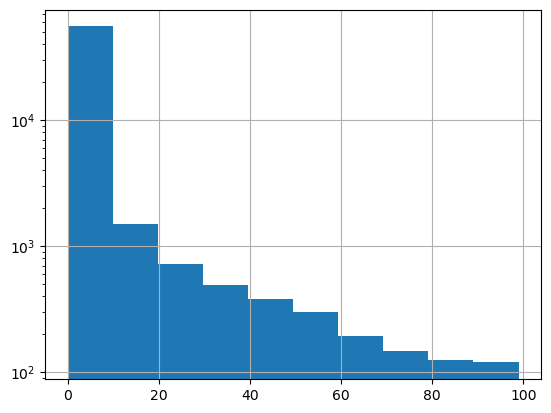

In [131]:
df_expression.loc[df_expression['expression'] < 100, 'expression'].hist()
plt.yscale('log')

In [123]:
df_expression['expression'].quantile(0.20), df_expression['expression'].quantile(0.80), df_expression['expression'].quantile(0.85)

(0.0, 0.0, 2.3601)

In [147]:
df_expression.shape

(60623, 3)

In [149]:
genes = []
for gene_id in transcript_to_gene.values():
    genes.append(gene_id.split('.')[0])

c = 0
missing = []
for gene_id in df_expression['gene_id']:
    if gene_id in genes:
        c += 1
    else:
        missing.append(gene_id)
        
print(f'genes from expression data present in map {c}')
print(f"genes missing {df_expression['gene_id'].shape[0] - c} | {len(missing)}")

genes from expression data present in map 59268
genes missing 1355 | 1355


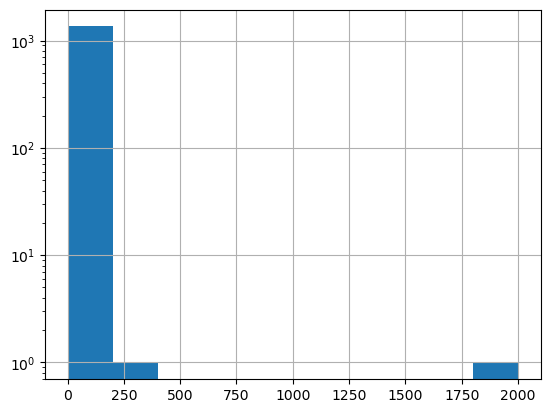

In [151]:
df_expression.loc[df_expression['gene_id'].isin(missing), 'expression'].hist()
plt.yscale('log')

In [152]:
transcript_to_gene

{'ENST00000832828.1': 'ENSG00000290825.2',
 'ENST00000450305.2': 'ENSG00000223972.6',
 'ENST00000831158.1': 'ENSG00000310526.1',
 'ENST00000831210.1': 'ENSG00000310526.1',
 'ENST00000831361.1': 'ENSG00000310526.1',
 'ENST00000831289.1': 'ENSG00000310526.1',
 'ENST00000831499.1': 'ENSG00000310526.1',
 'ENST00000831463.1': 'ENSG00000310526.1',
 'ENST00000831292.1': 'ENSG00000310526.1',
 'ENST00000831355.1': 'ENSG00000310526.1',
 'ENST00000831487.1': 'ENSG00000310526.1',
 'ENST00000831582.1': 'ENSG00000310526.1',
 'ENST00000488147.2': 'ENSG00000227232.6',
 'ENST00000619216.1': 'ENSG00000278267.1',
 'ENST00000834619.1': 'ENSG00000243485.6',
 'ENST00000473358.1': 'ENSG00000243485.6',
 'ENST00000469289.1': 'ENSG00000243485.6',
 'ENST00000607096.1': 'ENSG00000284332.1',
 'ENST00000834251.1': 'ENSG00000237613.3',
 'ENST00000833573.1': 'ENSG00000308361.1',
 'ENST00000832531.1': 'ENSG00000290826.2',
 'ENST00000642116.1': 'ENSG00000290826.2',
 'ENST00000606857.1': 'ENSG00000268020.3',
 'ENST00000